# [數據集](https://www.kaggle.com/datasets/sudhanshu2198/oil-spill-detection)
该数据集是从海洋的卫星图像开始开发的，其中一些包含石油泄漏，一些没有。
图像被分割成多个部分，并使用计算机视觉算法进行处理，以提供描述图像部分或补丁内容的特征向量。
任务是，
**给定一个描述卫星图像中某块区域内容的矢量，然后预测该区域是否包含漏油** 例如，非法或意外向海洋倾倒石油。

有两类，目标是使用<u>给定海洋区域的特征</u>来区分溢出和非溢出。
非溢出：否定情况或多数类别。
石油泄漏：正面案例或少数群体。

In [2]:
import numpy as np
import pandas as pd 

data = pd.read_csv('oil_spill.csv')
data[:10]

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


In [ ]:
# # 檢查是否包含非空數據
# data.isna().any()

# 機器學習部分

In [7]:
from sklearn.model_selection import train_test_split 
X = data[['f_2','f_3']]
# X.shape(937, 2)
Y = data[['target']]
# Y.shape (937, 1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)


In [10]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(749, 2) (749, 1) (188, 2) (188, 1)


In [9]:
knn_classifier.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = knn_classifier.predict(x_test)

In [12]:
# 直接使用sklearn中的api查看精准度
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9521276595744681

# 深度學習部分
參考<br>
https://www.kaggle.com/code/kkhandekar/oil-spills-prediction


In [13]:
# 重新配置數據集
X = data.drop('target',axis=1)
Y = data[['target']]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(749, 49) (749, 1) (188, 49) (188, 1)


In [14]:
input_shape = X.shape[1]
output_shape = Y.shape[1]
# 輸入特徵和輸出特徵
print(input_shape,output_shape)

49 1


## 構建模型

In [28]:
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf 

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Dense(units=8,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(output_shape,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 400       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 最後輸出01是二分類結果，所以直接用二分交叉熵作為損失函數
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision'])


In [36]:
history =model.fit(x = x_train,y = y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
24/24 [==============================] - 1s 1ms/step - loss: 1698.8746 - accuracy: 0.8465 - precision: 0.0349
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 2061.3523 - accuracy: 0.8398 - precision: 0.0430
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 1155.4333 - accuracy: 0.8331 - precision: 0.0408
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 1530.6333 - accuracy: 0.7917 - precision: 0.0584
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 2852.8347 - accuracy: 0.8131 - precision: 0.0354
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 587.4107 - accuracy: 0.8024 - precision: 0.0331 
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 847.2066 - accuracy: 0.7704 - precision: 0.0276
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 448.8929 - accuracy: 0.7583 - precision: 0.0380
Epoch 9/10
24/24 [================

dict_keys(['loss', 'accuracy', 'precision'])


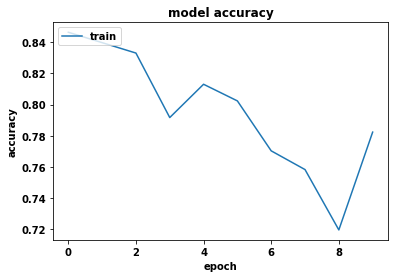

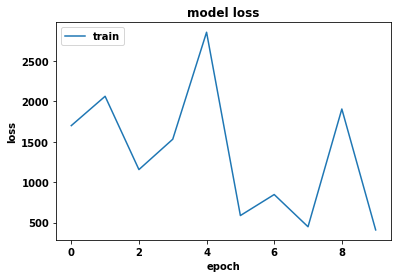

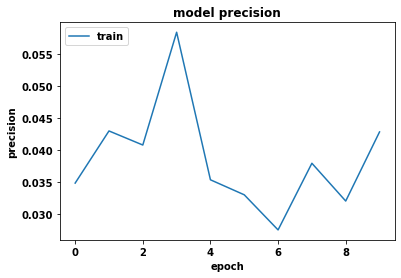

In [38]:
import matplotlib.pyplot as plt 

print(history.history.keys())
"""Accuracy"""
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
"""Loss"""
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
"""precision"""
plt.plot(history.history['precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [41]:
# 查看模型的精確度
print(history.history['accuracy'][-1])

0.7823765277862549
